In [1]:
#load the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import html5lib
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data
df = pd.read_csv('data/players4.csv')

In [3]:
df.head(-10)

,Name,Value,DOB,Season,Competition,Club ID#,PPG,Goals,Assists,Minutes,Age,Yellow Cards,Double Yellow,Red Card,Goal Contribution
0,Neymar,199.80,"Feb 5, 1992",2011,Club World Cup,2.0,1.5,1,0,180',19,0,0,0,1.0
1,Neymar,199.80,"Feb 5, 1992",2013,Champions League,10.0,2.0,4,5,775',21,1,0,0,9.0
2,Neymar,199.80,"Feb 5, 1992",2013,Copa del Rey,3.0,2.0,1,0,206',21,1,0,0,1.0
3,Neymar,199.80,"Feb 5, 1992",2013,LaLiga,26.0,2.31,9,10,1.736',21,6,0,0,19.0
4,Neymar,199.80,"Feb 5, 1992",2013,Supercopa,2.0,1.0,1,0,121',21,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,Mariano Díaz,19.35,"Aug 1, 1993",2016,Champions League,1,1.00,0,0,5',23,0,0,0,0.0
2903,Mariano Díaz,19.35,"Aug 1, 1993",2016,Club World Cup,-,-,0,0,0,23,0,0,0,0.0
2904,Mariano Díaz,19.35,"Aug 1, 1993",2016,Copa del Rey,5,2.20,4,1,183',23,0,0,0,5.0
2905,Mariano Díaz,19.35,"Aug 1, 1993",2016,LaLiga,8,2.75,1,1,114',23,0,0,0,2.0


In [5]:
# Replace dashes with zeros

#df['Assists'] = df['Assists'].replace('-', 0)
#df['Goals'] = df['Goals'].replace('-', 0)
#df['Minutes'] = df['Minutes'].replace('-', 0)
#df['Yellow Cards'] = df['Yellow Cards'].str.replace('-', '0')
#df['Double Yellow'] = df['Double Yellow'].str.replace('-', '0')
#df['Red Card'] = df['Red Card'].str.replace('-', '0')

In [6]:
#df['Yellow Cards'] = df['Yellow Cards'].str.strip()
#df['Double Yellow'] = df['Double Yellow'].str.strip()
#df['Red Card'] = df['Red Card'].str.strip()

In [7]:
# Covert to numeric 
#df['Goals'] = pd.to_numeric(df['Goals'])
#df['Assists'] = pd.to_numeric(df['Assists'])
#df['Yellow Cards'] = pd.to_numeric(df['Yellow Cards'])
#df['Double Yellow'] = pd.to_numeric(df['Double Yellow'])
#df['Red Card'] = pd.to_numeric(df['Red Card'])

In [8]:
# Create a new column goal contribution and assign it the total number of assists and goals

#df['Goal Contribution'] = np.nan
#for i in range(len(df)):
#    df['Goal Contribution'][i] = df['Goals'][i] + df['Assists'][i]

In [9]:
df.head(-10)

,Name,Value,DOB,Season,Competition,Club ID#,PPG,Goals,Assists,Minutes,Age,Yellow Cards,Double Yellow,Red Card,Goal Contribution
0,Neymar,199.80,"Feb 5, 1992",2011,Club World Cup,2.0,1.5,1,0,180',19,0,0,0,1.0
1,Neymar,199.80,"Feb 5, 1992",2013,Champions League,10.0,2.0,4,5,775',21,1,0,0,9.0
2,Neymar,199.80,"Feb 5, 1992",2013,Copa del Rey,3.0,2.0,1,0,206',21,1,0,0,1.0
3,Neymar,199.80,"Feb 5, 1992",2013,LaLiga,26.0,2.31,9,10,1.736',21,6,0,0,19.0
4,Neymar,199.80,"Feb 5, 1992",2013,Supercopa,2.0,1.0,1,0,121',21,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,Roque Santa Cruz,19.08,"Aug 16, 1981",2001,Bundesliga,22,2.27,5,3,1.317',20,0,0,0,8.0
2927,Roque Santa Cruz,19.08,"Aug 16, 1981",2001,Champions League,11,2.18,3,1,731',20,0,0,0,4.0
2928,Roque Santa Cruz,19.08,"Aug 16, 1981",2001,DFB-Pokal,3,2.00,1,1,300',20,0,0,0,2.0
2929,Roque Santa Cruz,19.08,"Aug 16, 1981",2001,Ligapokal,1,000,0,0,88',20,0,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2917 non-null   object 
 1   Value              2917 non-null   float64
 2   DOB                2917 non-null   object 
 3   Season             2917 non-null   int64  
 4   Competition        2917 non-null   object 
 5   Club ID#           2917 non-null   object 
 6   PPG                2917 non-null   object 
 7   Goals              2917 non-null   int64  
 8   Assists            2917 non-null   int64  
 9   Minutes            2917 non-null   object 
 10  Age                2917 non-null   int64  
 11  Yellow Cards       2917 non-null   int64  
 12  Double Yellow      2917 non-null   int64  
 13  Red Card           2917 non-null   int64  
 14  Goal Contribution  2917 non-null   float64
dtypes: float64(2), int64(7), object(6)
memory usage: 342.0+ KB


In [5]:
df.isna().sum()

Name                 0
Value                0
DOB                  0
Season               0
Competition          0
Club ID#             0
PPG                  0
Goals                0
Assists              0
Minutes              0
Age                  0
Yellow Cards         0
Double Yellow        0
Red Card             0
Goal Contribution    0
dtype: int64

In [6]:
print(df.nunique())

Name                  191
Value                  96
DOB                   188
Season                 32
Competition           163
Club ID#               89
PPG                   222
Goals                  36
Assists                19
Minutes              1284
Age                     5
Yellow Cards           15
Double Yellow           4
Red Card                3
Goal Contribution      44
dtype: int64


In [7]:
df['Competition'].unique()

array(['Club World Cup', 'Champions League', 'Copa del Rey', 'LaLiga',
       'Supercopa', 'Libertadores', 'Série A', 'Recopa Sudamericana',
       'Coupe de France', 'Coupe de la Ligue', 'Ligue 1',
       'Trophée des Champions', 'Bundesliga', 'DFB-Pokal', 'DFL-Supercup',
       'Allianz Cup', 'Champions League Qualifying', 'Europa League',
       'Liga NOS', 'Taça de Portugal Placard', 'FA Cup', 'League Cup',
       'Premier League', 'Community Shield', 'Europa League Qualifying',
       'UEFA Super Cup', 'UEFA Cup', 'Torneo Inicial', 'EFL Cup',
       'Eredivisie', 'Play-Offs Europa League', 'TOTO KNVB beker',
       'Johan Cruijff Schaal', 'Ligue 2', 'Championnat National',
       'Beker van Belgie', 'JPL Playoff II', 'Jupiler Pro League',
       'Jupiler Pro League playoff Europa League', 'Serie A',
       'Amstel Cup', 'KPN Eredivisie', 'Championship', 'U21 PL',
       '2ª B - Grupo I', 'Promoción LaLiga2', 'LaLiga2', 'Coppa Italia',
       'Supercoppa Italiana', 'Liga Portugal 2

In [8]:
a = pd.DataFrame(df['Competition'].value_counts().head(40)).reset_index()

In [9]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Name,Value,DOB,Season,Competition,Club ID#,PPG,Goals,Assists,Minutes,Age,Yellow Cards,Double Yellow,Red Card,Goal Contribution


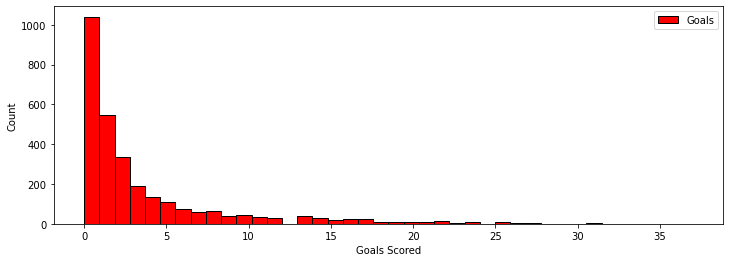

In [10]:
legend = ['Goals']
df1 = df[['Goals', 'Age']]
plt.figure(figsize=(12, 4))
plt.hist(df['Goals'], color=['red'], bins=40, ec='black')
plt.ylabel('Count')
plt.xlabel('Goals Scored')
plt.legend(legend)
plt.show()

In [11]:
df.Value.describe()

count    2917.000000
mean       37.042472
std        23.942031
min        19.170000
25%        22.500000
50%        28.800000
75%        38.700000
max       199.800000
Name: Value, dtype: float64

In [12]:
df.shape

(2917, 15)

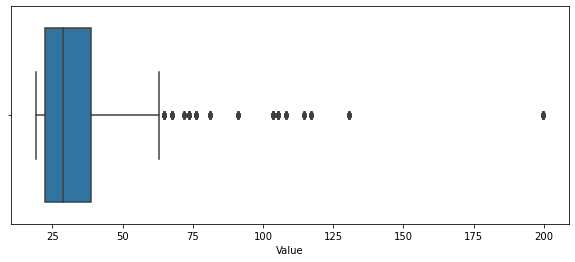

In [13]:
plt.subplots(figsize=(10,4))
sns.boxplot(x='Value', data=df)

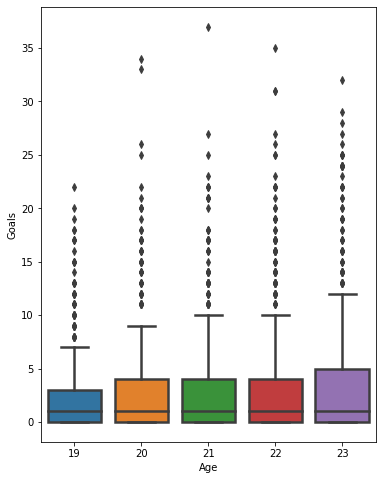

In [14]:
plt.subplots(figsize=(6,8))
sns.boxplot(x='Age', y='Goals', data= df , linewidth=2.5)

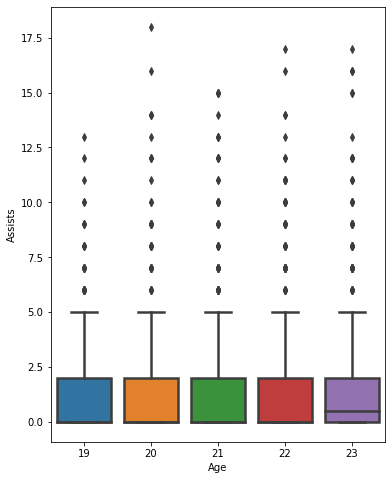

In [15]:
plt.subplots(figsize=(6,8))
sns.boxplot(x='Age', y='Assists', data= df , linewidth=2.5)

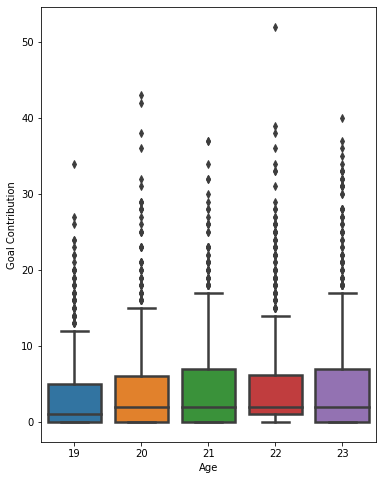

In [16]:
plt.subplots(figsize=(6,8))
sns.boxplot(x='Age', y='Goal Contribution', data= df , linewidth=2.5)

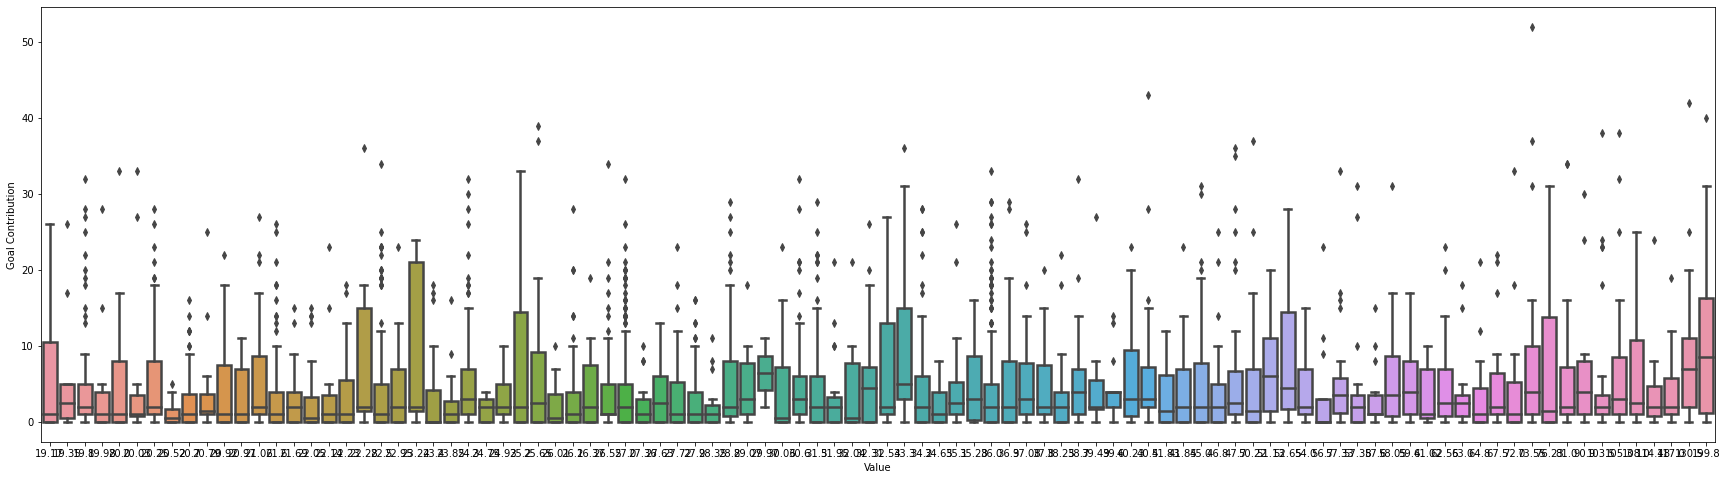

In [17]:
plt.subplots(figsize=(30,8))
sns.boxplot(x='Value', y='Goal Contribution', data= df , linewidth=2.5)

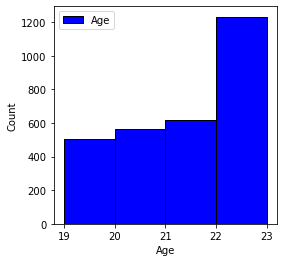

In [18]:
legend = ['Age']
plt.figure(figsize=(4, 4))
plt.hist(df['Age'], color=['blue'], bins=4, ec='black')
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(legend)
plt.show()


In [19]:
df.Age.describe()

count    2917.000000
mean       21.089133
std         1.384416
min        19.000000
25%        20.000000
50%        21.000000
75%        22.000000
max        23.000000
Name: Age, dtype: float64

,Goals,Assists,Age,Value,Goal Contribution,Yellow Cards,Double Yellow,Red Card
Goals,1.000000,0.605062,0.092287,0.072124,0.953677,0.618986,0.188852,0.166931
Assists,0.605062,1.000000,0.056937,0.142492,0.816550,0.513390,0.138981,0.095447
Age,0.092287,0.056937,1.000000,-0.039608,0.088427,0.023075,0.035661,-0.006678
Value,0.072124,0.142492,-0.039608,1.000000,0.106134,0.066627,0.025613,0.009339
Goal Contribution,0.953677,0.816550,0.088427,0.106134,1.000000,0.642782,0.189442,0.157099
Yellow Cards,0.618986,0.513390,0.023075,0.066627,0.642782,1.000000,0.227605,0.215437
Double Yellow,0.188852,0.138981,0.035661,0.025613,0.189442,0.227605,1.000000,0.042548
Red Card,0.166931,0.095447,-0.006678,0.009339,0.157099,0.215437,0.042548,1.000000


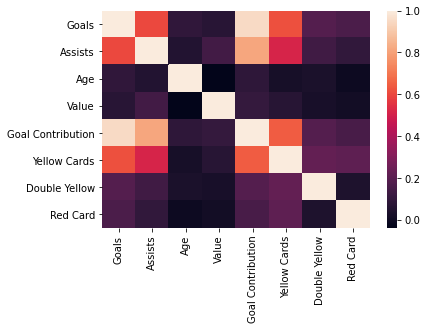

In [20]:
data = df[['Goals', 'Assists', 'Age', 'Minutes', 'Value', 'Goal Contribution', 'Yellow Cards', 'Double Yellow', 'Red Card']]
corr = data.corr()

#sns.heatmap(df.corr(['Goals', 'Assists']), cmap='RdYlGn')

sns.heatmap(corr)
corr

In [21]:
df.describe()

,Value,Season,Goals,Assists,Age,Yellow Cards,Double Yellow,Red Card,Goal Contribution
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,37.042472,2010.964004,3.320535,1.552965,21.089133,1.101474,0.028797,0.040795,4.873500
std,23.942031,6.215032,5.144593,2.680972,1.384416,1.874488,0.177219,0.207990,7.095428
min,19.170000,1988.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,2007.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,28.800000,2012.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,2.000000
75%,38.700000,2016.000000,4.000000,2.000000,22.000000,1.000000,0.000000,0.000000,6.000000
max,199.800000,2020.000000,37.000000,18.000000,23.000000,14.000000,3.000000,2.000000,52.000000


In [22]:
df.isna().sum()

Name                 0
Value                0
DOB                  0
Season               0
Competition          0
Club ID#             0
PPG                  0
Goals                0
Assists              0
Minutes              0
Age                  0
Yellow Cards         0
Double Yellow        0
Red Card             0
Goal Contribution    0
dtype: int64